In [2]:
import numpy as np
import pandas as pd

In [3]:
data500 = pd.read_csv('500_Cities_2016_CLT.bsv', '|')

In [4]:
data500Specific = data500[['Year', 'Category']]

In [5]:
data500Agg = data500.Category.value_counts()

In [6]:
data500Agg

Health Outcomes        2625
Prevention             2015
Unhealthy Behaviors    1010
Name: Category, dtype: int64

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

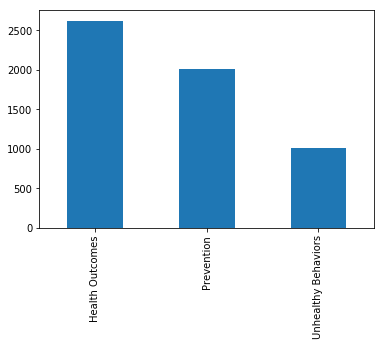

In [8]:
data500Agg.plot.bar()

In [9]:
data500AggYear = data500.Year.value_counts()


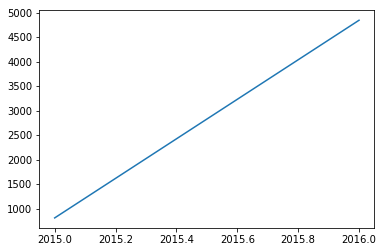

In [10]:
plt.plot(data500AggYear)

In [11]:
data500AggYearpd = pd.DataFrame(data500AggYear)

In [12]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit([[2016], [2015]],data500AggYearpd.iloc[:,0])
regr.predict(2017)

array([8876.])

In [13]:
dataLocation = pd.DataFrame(data500['GeoLocation'])

In [14]:
def getlatlong(x):
   return pd.Series([x.split(',')[0][1:],
                     x.split(',')[1][1:-1]],
                     index = ["lat", "lon"])

dataLocation = pd.DataFrame(dataLocation.GeoLocation.apply(getlatlong))

In [15]:
dataLocationNumber = pd.DataFrame(dataLocation, dtype="float64")

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init=4, max_iter=400, tol=0.0001)
kmeans.fit(dataLocation)
y_kmeans = kmeans.predict(dataLocation)
print(y_kmeans)

[0 0 0 ... 0 0 0]


In [17]:
dataClusterCenters = pd.DataFrame(kmeans.cluster_centers_)
dataClusterCenters

0          1
0  35.242582 -80.871872
1  35.260763 -80.750445
2  35.109078 -80.842397

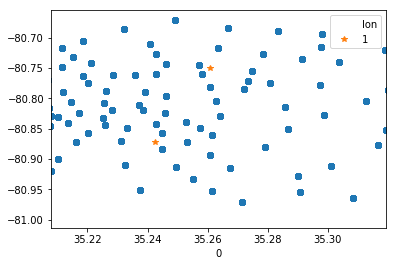

In [18]:
ax = dataLocationNumber.plot(x="lat", y="lon", style='o')
dataClusterCenters.plot(x=0, y=1, ax=ax, style='*' )

In [19]:
kmeans.score(dataLocationNumber)

-29.01093477388531

In [20]:
data2016 = data500[data500['Year'] == 2016]

In [21]:
data2015 = data500[data500['Year'] == 2015]

In [22]:
data2016Specific = data2016[['Year', 'Category']]

In [23]:
data2015Specific = data2015[['Year', 'Category']]

In [24]:
import warnings
warnings.filterwarnings('ignore')
dataGeoLocation = data500['GeoLocation'].reshape((data500.shape[0],1))
dataGeoLocation

array([['(35.2078721969, -80.8300754645)'],
       ['(35.2078721969, -80.8300754645)'],
       ['(35.225920035, -80.8441780027)'],
       ...,
       ['(35.3399287255, -80.8577077505)'],
       ['(35.3168646846, -80.8771596258)'],
       ['(35.3194029199, -80.8526132079)']], dtype=object)

In [25]:
dataCamino = pd.read_csv('usecase1/Camino.csv', '|')
dataMedAssist = pd.read_csv('usecase1/MedAssist.csv', '|')

In [26]:
if 'Zip' in dataCamino.columns:
    dataCamino.drop('Zip', axis=1, inplace=True)
if 'Zip' in dataMedAssist.columns:
    dataMedAssist.drop('Zip', axis=1, inplace=True)

In [27]:
dataMedAssist.head()

Number_African_Americans  Number_American_Indians  Number_Asians  \
0                       101                        0              1   
1                         1                        0              0   
2                        11                        0              2   
3                         1                        0              0   
4                        49                        0              9   

   Number_Caucasians  Number_Hispanics  Number_Other  
0                 15                20             2  
1                  0                 0             0  
2                 12                 8             1  
3                  1                 0             0  
4                 23                90            10

In [28]:
aggCamino = dataCamino.aggregate(['sum'])
aggMedAssist = dataMedAssist.aggregate(['sum'])

In [29]:
aggMedAssist

Number_African_Americans  Number_American_Indians  Number_Asians  \
sum                      1095                        2             87   

     Number_Caucasians  Number_Hispanics  Number_Other  
sum                487               791            78

Text(0.5,1,'Camino patient distibution')

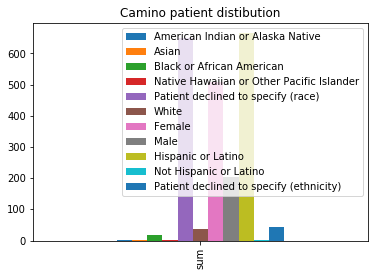

In [30]:
aggCamino.plot.bar()
plt.title("Camino patient distibution")

Text(0.5,1,'NC Med |Assist patient distibution')

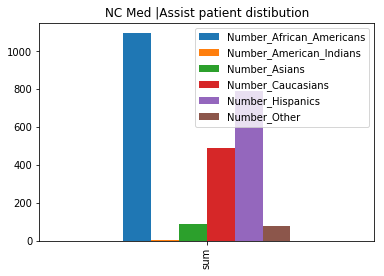

In [31]:
aggMedAssist.plot.bar()
plt.title("NC Med |Assist patient distibution")